In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
start = '2010-01-01'
end = '2022-05-15'

df = yf.download('TSLA',start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\yfinance\utils.py:628: UserWarning: Pandas requires version '2022.1' or newer of 'tzdata' (version '2021.5' currently installed).
  f_pre_midnight = (df.index.minute == 0) & (df.index.hour.isin([22, 23]))


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2991 non-null   float64
 1   High    2991 non-null   float64
 2   Low     2991 non-null   float64
 3   Close   2991 non-null   float64
 4   Volume  2991 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.0 KB


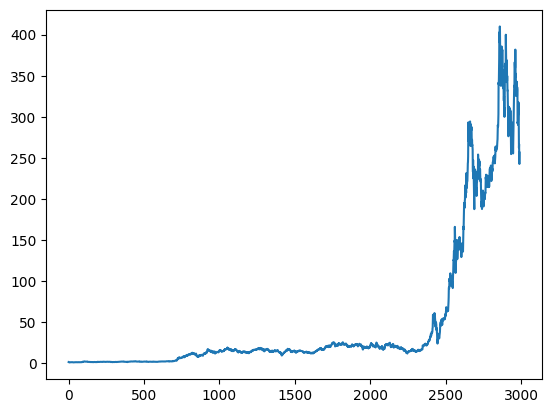

In [9]:
plt.plot(df.Close)

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2986    317.723499
2987    317.136999
2988    316.493932
2989    315.812032
2990    315.377532
Name: Close, Length: 2991, dtype: float64

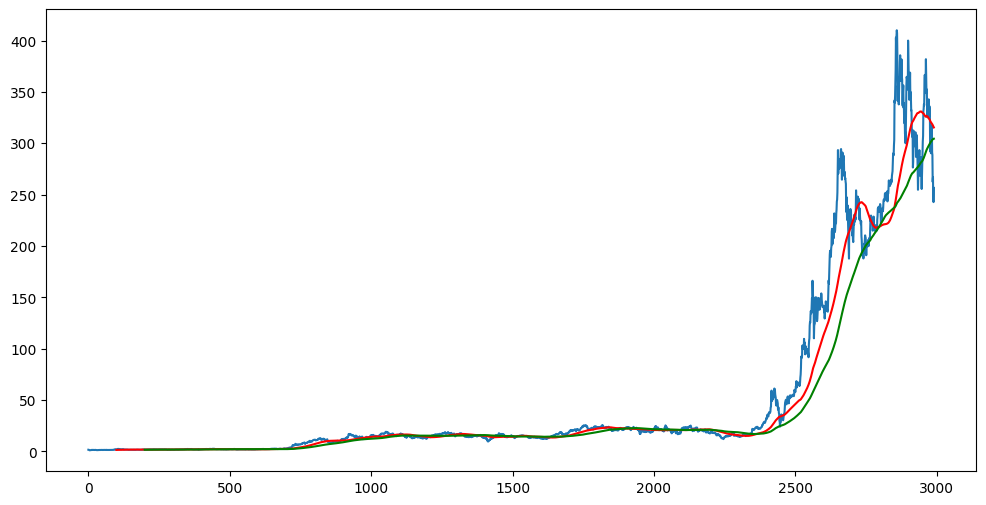

In [11]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

### Spliting Data into Trianing and Testing

In [12]:
data_training = pd.DataFrame(df['Close'][0: int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2093, 1)
(898, 1)


In [13]:
# convert into the 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2093, 1)

In [15]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [16]:
# convert into the numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train

array([[[0.02191227],
        [0.02174975],
        [0.01668473],
        ...,
        [0.04062838],
        [0.03756773],
        [0.03708018]],

       [[0.02174975],
        [0.01668473],
        [0.00920911],
        ...,
        [0.03756773],
        [0.03708018],
        [0.03816362]],

       [[0.01668473],
        [0.00920911],
        [0.00083967],
        ...,
        [0.03708018],
        [0.03816362],
        [0.04114302]],

       ...,

       [[0.70977783],
        [0.71248643],
        [0.72578546],
        ...,
        [0.64038455],
        [0.65812568],
        [0.66031957]],

       [[0.71248643],
        [0.72578546],
        [0.74734557],
        ...,
        [0.65812568],
        [0.66031957],
        [0.70636507]],

       [[0.72578546],
        [0.74734557],
        [0.72841276],
        ...,
        [0.66031957],
        [0.70636507],
        [0.69333695]]])

# Model 

In [18]:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=170, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units= 1))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 120)         

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 24s 292ms/step - loss: 0.0746
Epoch 2/50
63/63 [==============================] - 18s 290ms/step - loss: 0.0120
Epoch 3/50
63/63 [==============================] - 20s 309ms/step - loss: 0.0111
Epoch 4/50
63/63 [==============================] - 20s 322ms/step - loss: 0.0109
Epoch 5/50
63/63 [==============================] - 22s 344ms/step - loss: 0.0099
Epoch 6/50
63/63 [==============================] - 20s 310ms/step - loss: 0.0093
Epoch 7/50
63/63 [==============================] - 19s 306ms/step - loss: 0.0084
Epoch 8/50
63/63 [==============================] - 20s 325ms/step - loss: 0.0081
Epoch 9/50
63/63 [==============================] - 21s 326ms/step - loss: 0.0080
Epoch 10/50
63/63 [==============================] - 20s 318ms/step - loss: 0.0080
Epoch 11/50
63/63 [==============================] - 19s 298ms/step - loss: 0.0078
Epoch 12/50
63/63 [==============================] - 18s 283ms/step - loss: 0.0073
Epoch 13/50
6

In [23]:
model.save('model.h5')

In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14920\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,19.448000
1,18.982000
2,19.454666
3,19.782667
4,19.408667


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01888426],
       [0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993847],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822842],
       [0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208999],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403452],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407137],
       [0.02426565],
       [0.02365935],
       [0.02254555],
       [0.02080703],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995954],
       [0.02041175],
       [0.02856842],
       [0.02833895],
       [0.027

In [28]:
input_data.shape

(998, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(898, 100, 1)
(898,)


In [31]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 4s 103ms/step


(898, 1)

In [32]:
y_test

array([0.01357154, 0.01373066, 0.01928958, 0.01834495, 0.02275994,
       0.02544644, 0.02610802, 0.02527895, 0.02652172, 0.02768743,
       0.02804418, 0.02720506, 0.02714812, 0.02833728, 0.02887994,
       0.02873088, 0.02551009, 0.02675787, 0.02764053, 0.02838418,
       0.02936733, 0.02922664, 0.02822507, 0.02666743, 0.02459728,
       0.02797551, 0.02762713, 0.02828871, 0.02716654, 0.02872585,
       0.03006743, 0.03027009, 0.03083285, 0.02998034, 0.0311829 ,
       0.03145256, 0.03142576, 0.03313246, 0.0312767 , 0.02838083,
       0.02647314, 0.02579314, 0.02284703, 0.0235823 , 0.01949895,
       0.02464082, 0.02297264, 0.02594388, 0.02576467, 0.02196604,
       0.02033136, 0.02323392, 0.02612644, 0.02619176, 0.02672437,
       0.02780299, 0.02818654, 0.02603265, 0.02771255, 0.02798388,
       0.02819492, 0.02064959, 0.02009018, 0.01819254, 0.01884909,
       0.0197753 , 0.01966476, 0.01984565, 0.02173993, 0.02144683,
       0.02231609, 0.02242998, 0.02384693, 0.02315521, 0.02152

In [33]:
scaler.scale_

array([0.00251232])

In [34]:
scaler_factor = 1 / 0.00682769
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

In [35]:
from sklearn.metrics import r2_score
print('R2 Score: {}'.format(r2_score(y_test, y_predicted)))

R2 Score: 0.9607811187914108


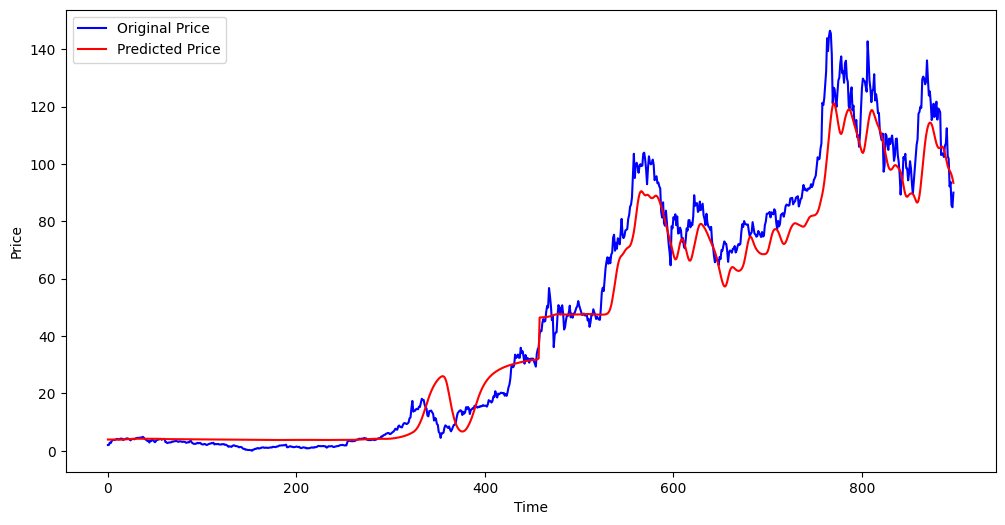

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()